In [1]:
# A good example to study "scikit-learn", "pandas" and Linear Regression

# Reference: 
# https://www.cnblogs.com/pinard/p/6016029.html
# Test file: ccpp.csv (Please download it in http://archive.ics.uci.edu/ml/machine-learning-databases/00294/)


In [2]:
# Input: ccpp.csv
# Target:
#  By using scikit-learn's LinearRegression, calculate the variables of a, b, c, d, e:
#       PE = a + b*AT + c*V + d*AP + e*RH


In [3]:
# Import the required libs:

import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import numpy as np
from sklearn import datasets, linear_model

In [4]:
#Read the csv file by pandas lib:
data = pd.read_csv('.\CCPP\ccpp.csv')

In [5]:
#Show the first 5 rows:
data.head()

,AT,V,AP,RH,PE
0,8.34,40.77,1010.84,90.01,480.48
1,23.64,58.49,1011.40,74.20,445.75
2,29.74,56.90,1007.15,41.91,438.76
3,19.07,49.69,1007.22,76.79,453.09
4,11.80,40.66,1017.13,97.20,464.43


In [6]:
#Select the first 4 columns
x = data[['AT', 'V','AP', 'RH']]
x.head()

,AT,V,AP,RH
0,8.34,40.77,1010.84,90.01
1,23.64,58.49,1011.40,74.20
2,29.74,56.90,1007.15,41.91
3,19.07,49.69,1007.22,76.79
4,11.80,40.66,1017.13,97.20


In [7]:
#Select the last column
y = data['PE']
y.head()

0    480.48
1    445.75
2    438.76
3    453.09
4    464.43
Name: PE, dtype: float64

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
#Split to train set and test set
X_train, X_test, y_train, y_test = train_test_split(x,y, random_state=1)

In [10]:
print(X_train.shape)

(7176, 4)


In [11]:
print(y_train.shape)

(7176,)


In [12]:
print(X_test.shape)

(2392, 4)


In [13]:
print(y_test.shape)

(2392,)


In [14]:
X_test.head()

,AT,V,AP,RH
5014,17.80,43.72,1008.71,78.50
6947,29.60,71.14,1011.46,52.69
9230,11.06,36.71,1021.67,80.44
4290,30.06,67.25,1017.63,53.59
6477,19.88,47.03,1012.27,91.99


Start to run scikit-learn

In [15]:
from sklearn.linear_model import LinearRegression

In [16]:
# Use Linear Regression model to fix training data set
linreg = LinearRegression()
linreg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [17]:
# You will get to know the parameters of a
print(linreg.intercept_)

447.0629709868735


In [18]:
# You will get to know the parameters of b,c,d,e
print(linreg.coef_)

[-1.97376045 -0.23229086  0.0693515  -0.15806957]


In [19]:
y_pred = linreg.predict(X_test)

In [20]:
y_pred.shape

(2392,)

In [21]:
# MSE and RMSE are good indicators to evluate the model; the less the better
from sklearn import metrics
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MSE: 20.080401202073904
RMSE: 4.481116066570236


In [22]:
#Try using 3 columns only
X = data[['AT', 'V', 'AP']]
y = data[['PE']]
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [23]:
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
linreg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [24]:
y_pred = linreg.predict(X_test)

In [25]:
from sklearn import metrics
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MSE: 23.208907470136225
RMSE: 4.817562399194869


In [26]:
# The MSE and RMSE are greater than previous case, 
# which means that the model becomes worse if 'RH' is NOT included.

In [27]:
#####

In [28]:
# Cross validation

In [29]:
x = data[['AT', 'V', 'AP', 'RH']]
y = data[['PE']]

In [30]:
from sklearn.model_selection import cross_val_predict
predicted = cross_val_predict(linreg, X, y, cv=10)

In [31]:
print('MSE:', metrics.mean_squared_error(y, predicted))

MSE: 23.913397561049177


In [32]:
print('RMSE:', np.sqrt(metrics.mean_squared_error(y, predicted)))

RMSE: 4.890132673154091


In [33]:
# Show the result in plot

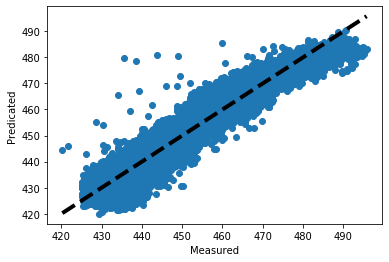

In [34]:
fig, ax = plt.subplots()
ax.scatter(y, predicted)
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicated')
plt.show()